In [1]:
# -----------------------------------------
# DO NOT EDIT THIS CELL
# -----------------------------------------
# The only exception is if you need to run "!pip install" to install a package prior to importing
# This cell loads the required Python packages

# This cell will read in the appropriate packages, as well as the dataset to be used in this assignment.

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data


In [2]:
# -----------------------------------------
# INSTRUCTIONS: TASK 1
# -----------------------------------------
# Calculate degree centrality and betweenness centrality for all nodes in G
# And place these into objects named "dc" and "bc"

# Calculate degree centrality for all nodes
dc = nx.degree_centrality(G)

# Calculate betweenness centrality for all nodes
bc = nx.betweenness_centrality(G)

print(f"Degree centrality calculated for {len(dc)} nodes")
print(f"Betweenness centrality calculated for {len(bc)} nodes")

Degree centrality calculated for 115 nodes
Betweenness centrality calculated for 115 nodes


In [3]:
# -----------------------------------------
# INSTRUCTIONS: TASK 2
# -----------------------------------------
# Calculate median degree centrality and betweenness centrality
# And place these into objects named "dc_med" and "bc_med"

# Calculate median degree centrality
dc_med = np.median(list(dc.values()))

# Calculate median betweenness centrality
bc_med = np.median(list(bc.values()))

print(f"Median degree centrality: {dc_med:.4f}")
print(f"Median betweenness centrality: {bc_med:.4f}")

Median degree centrality: 0.0965
Median betweenness centrality: 0.0118


In [4]:
# -----------------------------------------
# INSTRUCTIONS: TASK 3
# -----------------------------------------
# Using "dc_med" create a subgraph that only includes nodes with degree centrality above the median degree centrality value
# And name this subgraph "dc_subg"

# Find nodes with degree centrality above median
high_dc_nodes = [node for node, centrality in dc.items() if centrality > dc_med]

# Create subgraph with these nodes
dc_subg = G.subgraph(high_dc_nodes).copy()

print(f"Original graph has {G.number_of_nodes()} nodes")
print(f"Degree centrality subgraph has {dc_subg.number_of_nodes()} nodes")
print(f"Nodes with degree centrality above median: {len(high_dc_nodes)}")

Original graph has 115 nodes
Degree centrality subgraph has 12 nodes
Nodes with degree centrality above median: 12


In [5]:
# -----------------------------------------
# INSTRUCTIONS: TASK 4
# -----------------------------------------
# Using "bc_med" create a subgraph that only includes nodes with betweenness centrality above the median betweenness centrality value
# And name this subgraph "bc_subg"

# Find nodes with betweenness centrality above median
high_bc_nodes = [node for node, centrality in bc.items() if centrality > bc_med]

# Create subgraph with these nodes
bc_subg = G.subgraph(high_bc_nodes).copy()

print(f"Original graph has {G.number_of_nodes()} nodes")
print(f"Betweenness centrality subgraph has {bc_subg.number_of_nodes()} nodes")
print(f"Nodes with betweenness centrality above median: {len(high_bc_nodes)}")

Original graph has 115 nodes
Betweenness centrality subgraph has 57 nodes
Nodes with betweenness centrality above median: 57


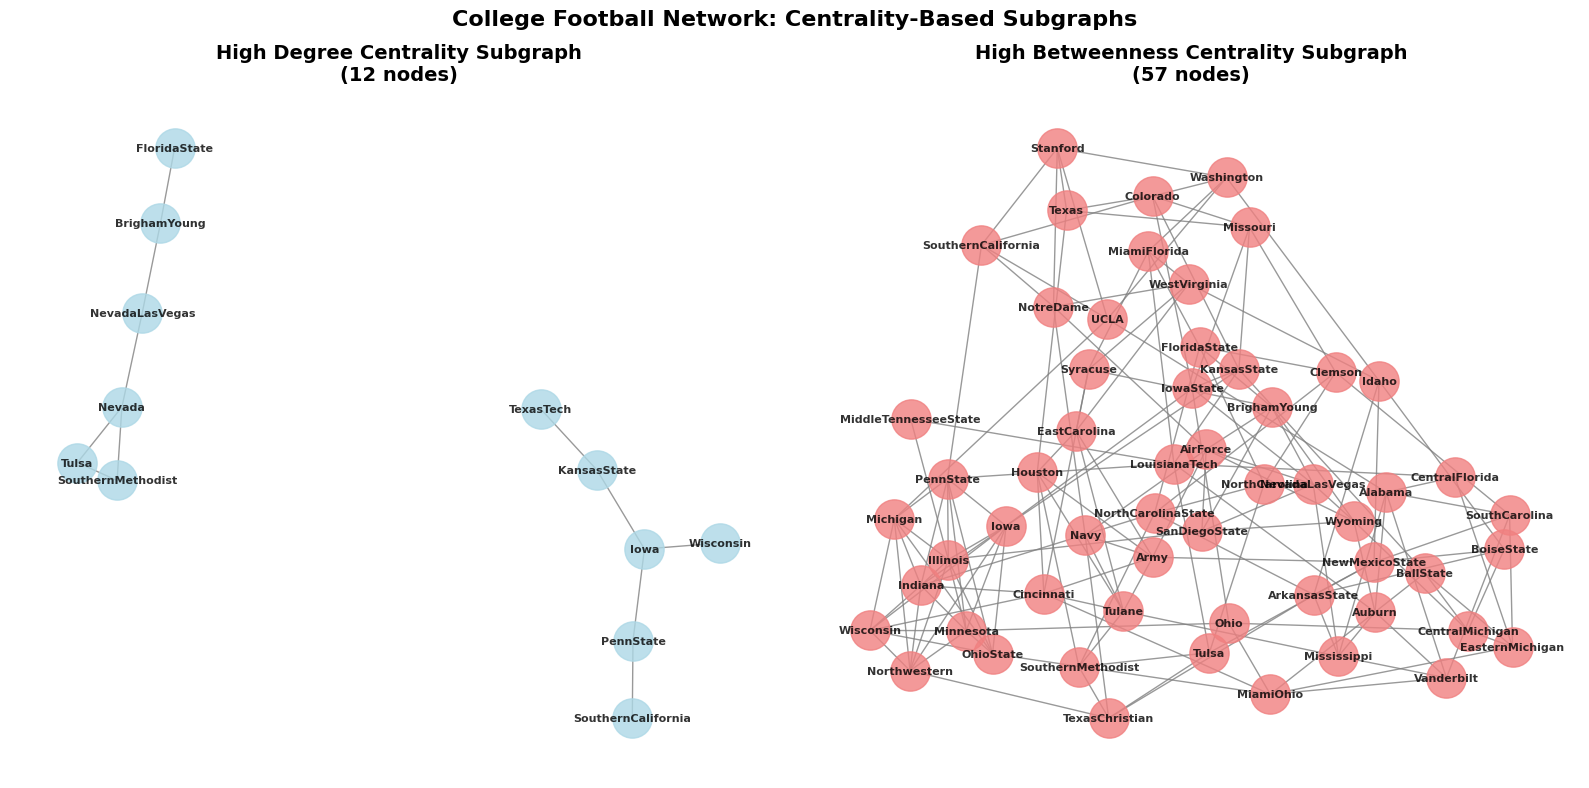


SUMMARY:
Original network: 115 nodes, 613 edges
High degree centrality subgraph: 12 nodes, 11 edges
High betweenness centrality subgraph: 57 nodes, 162 edges
Median degree centrality: 0.0965
Median betweenness centrality: 0.0118


In [6]:
# -----------------------------------------
# INSTRUCTIONS: TASK 5
# -----------------------------------------
# Create and display a figure that visualizes both subgraphs side by side
# Degree centrality subgraph (dc_subg) on the left, and betweenness centrality subgraph (bc_subg) on the right

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Left subplot: Degree Centrality Subgraph
pos1 = nx.spring_layout(dc_subg, seed=42)  # Fixed seed for reproducibility
nx.draw(dc_subg, pos=pos1, ax=ax1,
        with_labels=True, node_color='lightblue',
        node_size=800, font_size=8, font_weight='bold',
        edge_color='gray', alpha=0.8)
ax1.set_title(f'High Degree Centrality Subgraph\n({dc_subg.number_of_nodes()} nodes)',
              fontsize=14, fontweight='bold')

# Right subplot: Betweenness Centrality Subgraph
pos2 = nx.spring_layout(bc_subg, seed=42)  # Fixed seed for reproducibility
nx.draw(bc_subg, pos=pos2, ax=ax2,
        with_labels=True, node_color='lightcoral',
        node_size=800, font_size=8, font_weight='bold',
        edge_color='gray', alpha=0.8)
ax2.set_title(f'High Betweenness Centrality Subgraph\n({bc_subg.number_of_nodes()} nodes)',
              fontsize=14, fontweight='bold')

# Overall title
fig.suptitle('College Football Network: Centrality-Based Subgraphs',
             fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSUMMARY:")
print("="*50)
print(f"Original network: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"High degree centrality subgraph: {dc_subg.number_of_nodes()} nodes, {dc_subg.number_of_edges()} edges")
print(f"High betweenness centrality subgraph: {bc_subg.number_of_nodes()} nodes, {bc_subg.number_of_edges()} edges")
print(f"Median degree centrality: {dc_med:.4f}")
print(f"Median betweenness centrality: {bc_med:.4f}")